# Exploration

In [1]:
# currently running into problems when running folium 
# on datahub but it works localls

import scipy
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import geopy.distance
from scipy.stats import mode
from ipywidgets import interact
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
phoible_data = pd.read_csv('phoible_elevation.csv')
phoible_data.head()

InventoryID Source LanguageCode LanguageName Glottocode     GlottologName  \
0            1    SPA          kor       Korean   kore1280            Korean   
1            2    SPA          ket          Ket   kett1243               Ket   
2            3    SPA          lbe          Lak   lakk1252               Lak   
3            4    SPA          kbd    Kabardian   kaba1278         Kabardian   
4            5    SPA          kat     Georgian   nucl1302  Nuclear Georgian   

   Trump LanguageFamilyRoot  LanguageFamilyGenus             Country    Area  \
0      1               asis               Korean        Korea, South    Asia   
1      1               yeos            Yeniseian  Russian Federation  Europe   
2      1               ncau           Lak-Dargwa  Russian Federation  Europe   
3      1               ncau  Northwest Caucasian  Russian Federation  Europe   
4      1               kart           Kartvelian             Georgia    Asia   

  Population  Latitude  Longitude  Phonemes  Consonants  Tones  Vowels  \
0   42000000   37.5000   128.0000        40          22      0      18   
1        190   63.7551    87.5466        32          18      0      14   
2     157000   42.1328    47.0809        69          60      0       9   
3     520000   43.5082    43.3918        56          49      0       7   
4    3900000   39.3705    45.8066        35          29      0       6   

     elevation  
0   330.066681  
1    25.690624  
2  2169.640625  
3   943.938354  
4  2204.326416

In [13]:
#Recreated for convenience and Converted Population column to numerical values
#phoib now only has rows who's population column value was a number

phoib = phoible_data[phoible_data["Population"].apply(lambda x: str(x).isdigit())]
phoib["Population"] = [int(i) for i in phoib["Population"]]
phoib.head()

InventoryID Source LanguageCode LanguageName Glottocode     GlottologName  \
0            1    SPA          kor       Korean   kore1280            Korean   
1            2    SPA          ket          Ket   kett1243               Ket   
2            3    SPA          lbe          Lak   lakk1252               Lak   
3            4    SPA          kbd    Kabardian   kaba1278         Kabardian   
4            5    SPA          kat     Georgian   nucl1302  Nuclear Georgian   

   Trump LanguageFamilyRoot  LanguageFamilyGenus             Country    Area  \
0      1               asis               Korean        Korea, South    Asia   
1      1               yeos            Yeniseian  Russian Federation  Europe   
2      1               ncau           Lak-Dargwa  Russian Federation  Europe   
3      1               ncau  Northwest Caucasian  Russian Federation  Europe   
4      1               kart           Kartvelian             Georgia    Asia   

   Population  Latitude  Longitude  Phonemes  Consonants  Tones  Vowels  \
0    42000000   37.5000   128.0000        40          22      0      18   
1         190   63.7551    87.5466        32          18      0      14   
2      157000   42.1328    47.0809        69          60      0       9   
3      520000   43.5082    43.3918        56          49      0       7   
4     3900000   39.3705    45.8066        35          29      0       6   

     elevation  
0   330.066681  
1    25.690624  
2  2169.640625  
3   943.938354  
4  2204.326416

In [3]:
wals_data = pd.read_csv('wals_data/language.csv')
wals_data.head()

wals_code iso_code glottocode                   Name   latitude   longitude  \
0       aab      NaN        NaN          Arapesh (Abu)  -3.450000  142.950000   
1       aar      aiw   aari1239                   Aari   6.000000   36.583333   
2       aba      aau   abau1245                   Abau  -4.000000  141.250000   
3       abb      shu   chad1249  Arabic (Abbéché Chad)  13.833333   20.833333   
4       abd      abi   abid1235                 Abidji   5.666667   -4.583333   

            genus        family  macroarea countrycodes  \
0  Kombio-Arapesh    Torricelli        NaN           PG   
1    South Omotic  Afro-Asiatic     Africa           ET   
2     Upper Sepik         Sepik  Papunesia           PG   
3         Semitic  Afro-Asiatic     Africa           TD   
4             Kwa   Niger-Congo     Africa           CI   

                      ...                       \
0                     ...                        
1                     ...                        
2                     ...                        
3                     ...                        
4                     ...                        

  137B M in Second Person Singular 136B M in First Person Singular  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   

  109B Other Roles of Applied Objects 10B Nasal Vowels in West Africa  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                                 NaN                             NaN   
3                                 NaN                             NaN   
4                                 NaN                             NaN   

  25B Zero Marking of A and P Arguments  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  21B Exponence of Tense-Aspect-Mood Inflection  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

  108B Productivity of the Antipassive Construction  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand'  \
0                                                NaN                           
1                                                NaN                           
2                                                NaN                           
3                                                NaN                           
4                                                NaN                           

  58B Number of Possessive Nouns 79B Suppletion in Imperatives and Hortatives  
0                            NaN                                          NaN  
1                            NaN                                          NaN  
2                            NaN                                          NaN  
3                            NaN                                          NaN  
4                            NaN                                          NaN  

[5 rows x 202 columns]

In [4]:
# multiple rows for some of these Language Codes
sum(pd.DataFrame.from_dict(Counter(
    phoible_data['LanguageCode']), orient='index').reset_index().sort_values(0, ascending=False)[0] > 1)

377

In [5]:
len(list(set(phoible_data['LanguageCode'])))

1672

In [6]:
# same thing as above
phoible_data.groupby(['Source', 'LanguageCode']).count().sort_values('LanguageName', ascending=False).head(10)

InventoryID  LanguageName  Glottocode  GlottologName  \
Source LanguageCode                                                         
GM     sgw                     6             6           6              6   
       gwn                     6             6           6              6   
       nyf                     6             6           6              6   
       bva                     4             4           4              4   
       ndo                     4             4           4              4   
SAPHON wca                     3             3           3              3   
       cas                     3             3           3              3   
GM     lmp                     3             3           3              3   
       xtc                     3             3           3              3   
SAPHON qvn                     3             3           3              3   

                     Trump  LanguageFamilyRoot  LanguageFamilyGenus  Country  \
Source LanguageCode                                                            
GM     sgw               6                   6                    6        6   
       gwn               6                   6                    6        6   
       nyf               6                   6                    6        6   
       bva               4                   4                    4        4   
       ndo               4                   4                    4        4   
SAPHON wca               3                   3                    3        3   
       cas               3                   3                    3        3   
GM     lmp               3                   3                    3        3   
       xtc               3                   3                    3        3   
SAPHON qvn               3                   3                    3        3   

                     Area  Population  Latitude  Longitude  Phonemes  \
Source LanguageCode                                                    
GM     sgw              6           6         6          6         6   
       gwn              6           6         6          6         6   
       nyf              6           6         6          6         6   
       bva              4           4         4          4         4   
       ndo              4           4         4          4         4   
SAPHON wca              3           3         3          3         3   
       cas              3           3         3          3         3   
GM     lmp              3           3         3          3         3   
       xtc              3           3         3          3         3   
SAPHON qvn              3           3         3          3         3   

                     Consonants  Tones  Vowels  elevation  
Source LanguageCode                                        
GM     sgw                    6      6       6          6  
       gwn                    6      6       6          6  
       nyf                    6      6       6          6  
       bva                    4      4       4          4  
       ndo                    4      4       4          4  
SAPHON wca                    3      3       3          3  
       cas                    3      3       3          3  
GM     lmp                    3      3       3          3  
       xtc                    3      3       3          3  
SAPHON qvn                    3      3       3          3

In [7]:
# same language code, but different language name? What is `Trump`?
cond = np.logical_and(phoible_data['Source'] == 'GM', phoible_data['LanguageCode'] == 'sgw')
phoible_data[cond]

InventoryID Source LanguageCode LanguageName Glottocode  \
1458         1459     GM          sgw        Muher   seba1251   
1459         1460     GM          sgw         Ezha   seba1251   
1460         1461     GM          sgw        Chaha   seba1251   
1461         1462     GM          sgw        Gumer   seba1251   
1462         1463     GM          sgw         Gura   seba1251   
1463         1464     GM          sgw        Gyeto   seba1251   

         GlottologName  Trump LanguageFamilyRoot LanguageFamilyGenus  \
1458  Sebat Bet Gurage      1               afas             Semitic   
1459  Sebat Bet Gurage      2               afas             Semitic   
1460  Sebat Bet Gurage      3               afas             Semitic   
1461  Sebat Bet Gurage      4               afas             Semitic   
1462  Sebat Bet Gurage      5               afas             Semitic   
1463  Sebat Bet Gurage      6               afas             Semitic   

       Country    Area Population  Latitude  Longitude  Phonemes  Consonants  \
1458  Ethiopia  Africa    2320000   8.11879    37.9891        42          34   
1459  Ethiopia  Africa    2320000   8.11879    37.9891        39          33   
1460  Ethiopia  Africa    2320000   8.11879    37.9891        44          36   
1461  Ethiopia  Africa    2320000   8.11879    37.9891        42          35   
1462  Ethiopia  Africa    2320000   8.11879    37.9891        42          36   
1463  Ethiopia  Africa    2320000   8.11879    37.9891        45          39   

      Tones  Vowels    elevation  
1458      0       8  2262.824463  
1459      0       6  2262.824463  
1460      0       8  2262.824463  
1461      0       7  2262.824463  
1462      0       6  2262.824463  
1463      0       6  2262.824463

In [8]:
mp = folium.Map(zoom_start=12)
for coords in list(zip(wals_data['latitude'], wals_data['longitude'])):
    folium.Circle(
        radius=100,
        location=coords,
        color='crimson',
        fill=False,).add_to(mp)
mp

# Start of Assignment

## Background

One big question in cognitive science is the relationship between linguistic features (e.g. number of vowels, word order and number of tense categories) and non-linguistic features (e.g. population size, altitude and climate). In particular, a lot of attention has been paid to the relationship between population size and various linguistic features. People have looked at the relationship between population size and:

- size of the phoneme inventory

- morphological complexity

- Relationship between population size and phonemic inventory

Phonemes are individual sounds. They come from the IPA, which is the phonetic alphabet. Phonemes can either be consonants or vowels. Languages have a fixed number of phonemes. The best data source for this is PHOIBLE. 
Visualize the following univariate distributions both as a histogram and on a map:
- Number of consonants

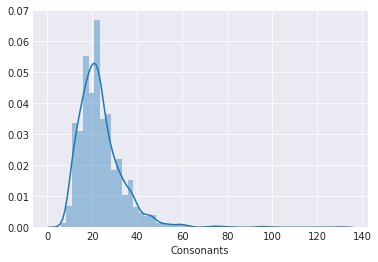

In [9]:
sns.distplot(phoible_data['Consonants'])

In [14]:
# TODO: write something to pick the colors and bin sizes once given the number of bins
# (should probably look at how the datascience package does histograms tbh)
def map_with_bins(bin_cutoffs, bin_names, color_lst, column, df):
    """Takes a column from a df, determines what bin each row lies
    in, then plots on a map with the color dependent on the bin"""
    bins = pd.cut(df[column], bin_cutoffs, labels=bin_names)
    
    bin_to_color = dict(zip(bin_names, color_lst))

    mapper = folium.Map(zoom_start=8)
    for lat, lon , bn in list(zip(df['Latitude'], df['Longitude'], bins)):
        folium.Circle(
            radius=300,
            location=[lat, lon],
            color=bin_to_color[bn],
            fill=False).add_to(mapper)
    return mapper

In [15]:
# stands for good phoib
phoib_gd = phoib.dropna()

bin_cutoffs = [5, 15, 25, 35, 131]
bin_names = ['5-15', '15-25', '25-35', '35+']
color_lst = ['#0226F7', '#7085D5', '#997BB9', '#DB0008']

map_with_bins(bin_cutoffs, bin_names, color_lst, 'Consonants', phoib_gd)

- Number of vowels

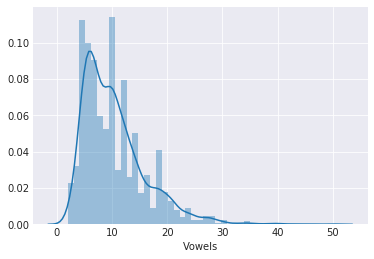

In [16]:
sns.distplot(phoible_data['Vowels'])

In [18]:
bin_cutoffs = [10, 20, 30, 40, 50, 200]
bin_names = ['10-20', '20-30', '30-40', '40-50', '50+']
color_lst = ['#0226F7', '#7085D5', '#997BB9', '#D66B8F', '#DB0008']

map_with_bins(bin_cutoffs, bin_names, color_lst, 'Phonemes', phoib_gd)

- Number of phonemes

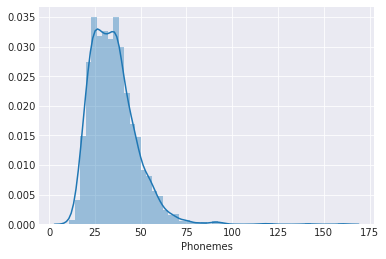

In [19]:
sns.distplot(phoible_data['Phonemes'])

In [20]:
bin_cutoffs = [5, 15, 25, 35, 131]
bin_names = ['5-15', '15-25', '25-35', '35+']
color_lst = ['#0226F7', '#7085D5', '#997BB9', '#DB0008']

map_with_bins(bin_cutoffs, bin_names, color_lst, 'Consonants', phoib_gd)

Visualize those same distributions grouped by continent and grouped by genetic affiliation. The continent is called `area` in PHOIBLE. The genetic affiliation is called `Family` in WALS. WALS and PHOIBLE both identify languages with ISO 639-3, so you should be able to match them up. 

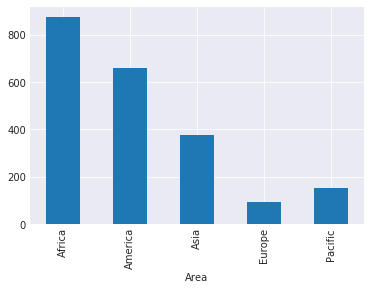

In [21]:
#By Continent
phoible_data.groupby(by = "Area").size().plot.bar()

You could try looking at number of phonemes plotted against latitude/longitude, but I doubt anything will come of it.

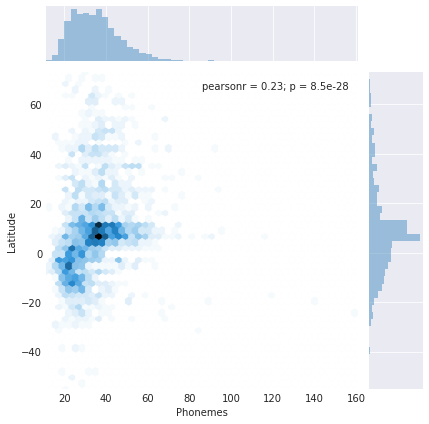

In [22]:
sns.jointplot('Phonemes', 'Latitude', data=phoible_data, kind='hex')

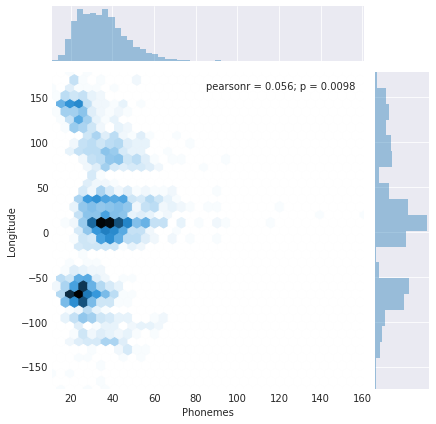

In [23]:
sns.jointplot('Phonemes', 'Longitude', data=phoible_data, kind='hex')

Visualize the relationship between number of consontants and number of vowels, again by all language, by continent and by genetic affiliation.

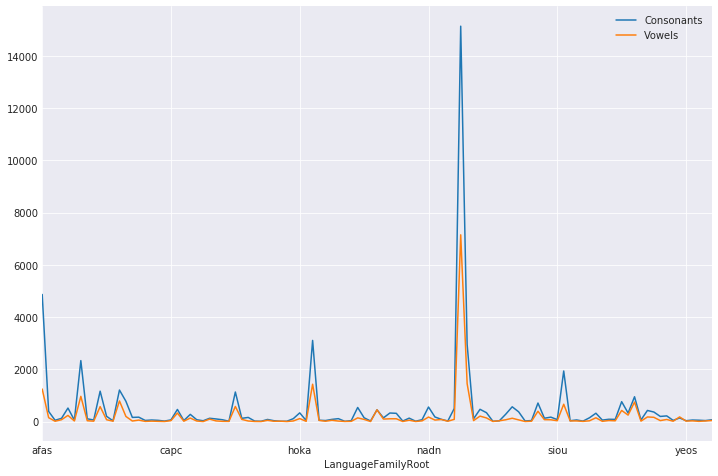

In [24]:
#By Language
pho_lang = phoible_data.loc[:,["LanguageFamilyRoot","Consonants", "Vowels"]]
pho_lang = pho_lang.groupby(by = "LanguageFamilyRoot").sum()
pho_lang = pho_lang.drop("UNCLASSIFIED")
pho_lang.plot(figsize = (12,8))

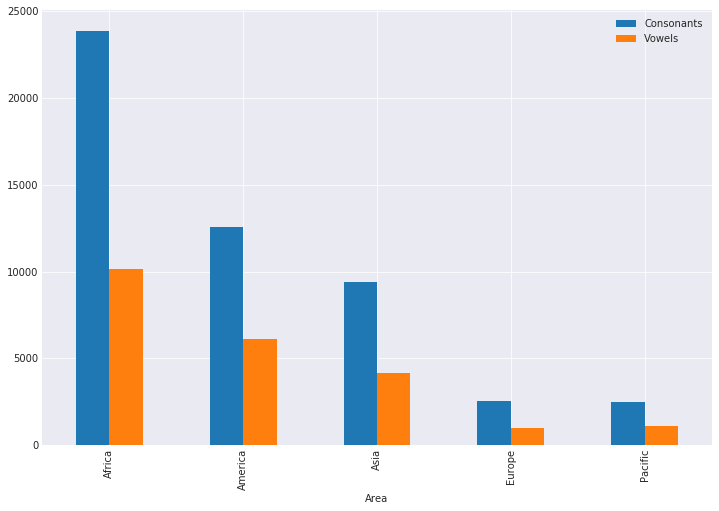

In [25]:
#By Continent
pho_cont = phoible_data.loc[:,["Area","Consonants", "Vowels"]]
pho_cont = pho_cont.groupby(by = "Area").sum()
pho_cont.plot.bar(figsize = (12,8))

In [26]:
#By Genetic Affiliation NEED TO COMBINE WITH WALS

Visualize the relationship between population size and phoneme inventory size, again by all language, by continent and by genetic affiliation.

In [28]:
def overlay_hex(x_values, y_values):
    """Overlays a regression line on top of a hex plot
    Works well when dealing with a large number of observations"""
    g = sns.jointplot(x_values, y_values, kind="hex")
    sns.regplot(x_values, y_values, ax=g.ax_joint, scatter=False)

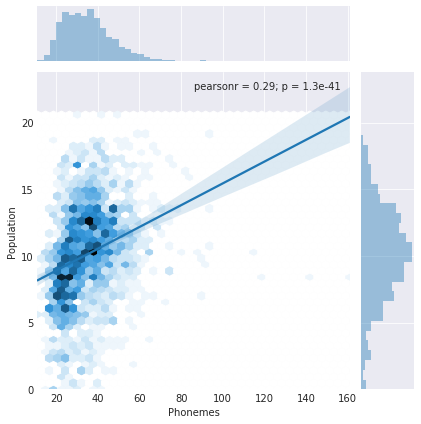

In [29]:
overlay_hex(phoib["Phonemes"], np.log(phoib["Population"]))

Someone has claimed that phoneme inventory size and distance from Africa are inversely related. You could use the latitude/longitude in PHOIBLE for this. You may have to arbitrarily choose the mid-point of Africa for this.

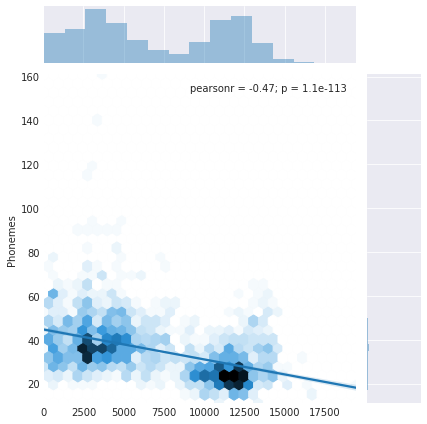

In [30]:
coordinates = list(zip(phoib.dropna()['Latitude'], phoib.dropna()['Longitude']))

# chose this point b/c it comes up when
# you google search 'africa coordinates'
africa_center = (8.7832, 34.5085)

# calculate the distance to each language's listed location
distances = np.array([geopy.distance.vincenty(point, africa_center).km for point in coordinates])

overlay_hex(distances, phoib.dropna()['Phonemes'])

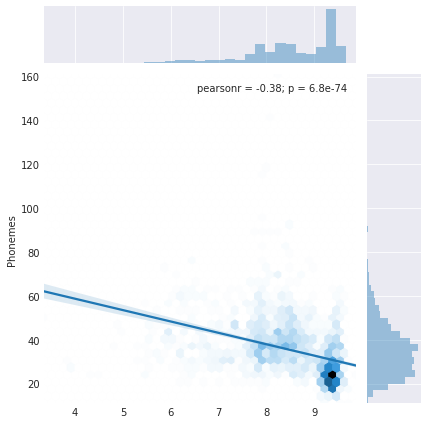

In [31]:
# did the same, but logged the distances this time
overlay_hex(np.log(distances), phoib.dropna()['Phonemes'])

Phonemes
Area              
Africa   40.984988
America  28.490939
Asia     36.252660
Europe   38.782609
Pacific  23.741497

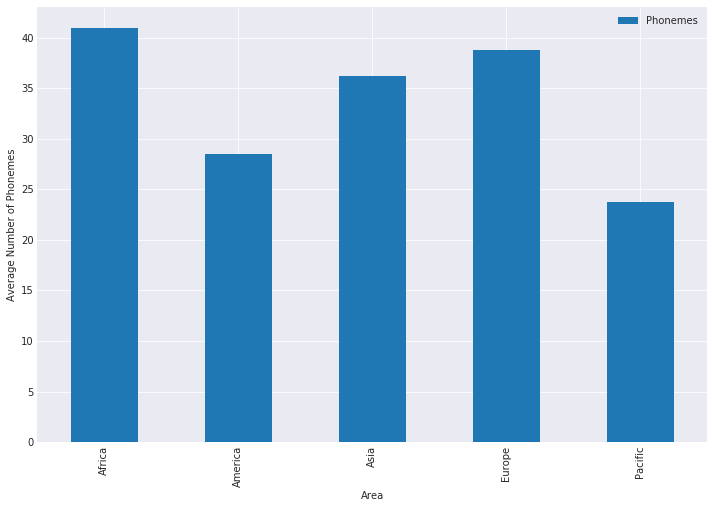

In [32]:
pho_pop_cont = phoib.loc[:,["Area", "Phonemes"]]
pho_pop_cont = pho_pop_cont.groupby(by = "Area").mean()
pho_pop_cont[['Phonemes']].plot.bar(figsize = (12,8))
plt.ylabel('Average Number of Phonemes')
pho_pop_cont

What are the most common phonemes in the world? What is the distribution of frequency? That is, there are about 2,000 phonemes in PHOIBLE, but only a handful are common and there's a long tail. One problem here is that PHOIBLE is not a random sample of languages. So, you could sample languages from PHOIBLE proportional to their population size and arrive at an estimate that way.

Phonemes can be described by a set of (mostly) binary features. PHOIBLE has this data too. Is the distribution of featue values evenly split for each feature? If not, which features are more prone to being either 0 or 1?
Are some phonemes only present in some area of genetic affiliation? (There should be. For example, 'kp' and 'gb' are likely only in Africa.)

One of the features of phonemes is tone. If a language has a phoneme with tone, it counts as a "tone language". Are most language tone? Where are the tone langauges on the map?

In [33]:
tone_languages = phoib['Tones'] > 0
num_tone_languages = sum(tone_languages)
total_languages = len(phoib)
print('There are {} tone languages out of our dataset of {} languages.'.format(num_tone_languages, total_languages))
print("That's about {}%.".format(np.round(num_tone_languages/total_languages*100, 2)))

There are 590 tone languages out of our dataset of 2088 languages.
That's about 28.26%.


In [34]:
tone = phoib[tone_languages]
tone.head()

InventoryID Source LanguageCode      LanguageName Glottocode  \
5             6    SPA          bsk        Burushaski   buru1296   
14           15    SPA          vie        Vietnamese   viet1252   
15           16    SPA          cmn  Mandarin Chinese   mand1415   
16           17    SPA          wuu                Wu   wuch1236   
17           18    SPA          hak             Hakka   hakk1236   

       GlottologName  Trump LanguageFamilyRoot LanguageFamilyGenus   Country  \
5         Burushaski      1               asis          Burushaski  Pakistan   
14        Vietnamese      1               ausa          Viet-Muong  Viet Nam   
15  Mandarin Chinese      2               sitb             Chinese     China   
16        Wu Chinese      1               sitb             Chinese     China   
17     Hakka Chinese      1               sitb             Chinese     China   

    Area  Population  Latitude  Longitude  Phonemes  Consonants  Tones  \
5   Asia       87000   36.2161    74.8236        53          38      3   
14  Asia    65800000   18.3887   106.7570        39          21      6   
15  Asia   840000000   40.0209   116.2280        43          27      4   
16  Asia    77200000   29.8621   119.6820        41          29      3   
17  Asia    25700000   25.0000   116.0000        31          21      4   

    Vowels    elevation  
5       12  3413.164062  
14      12   -53.336613  
15      12    53.678146  
16       9   119.777588  
17       6   404.901245

In [35]:
# two rows in tone don't have coordinates, need to filter them out
valid_coords = tone['Latitude'] == tone['Latitude']
mappable_tone = tone[valid_coords]

mp = folium.Map(zoom_start=12)
for coords in list(zip(mappable_tone['Latitude'], mappable_tone['Longitude'])):
    folium.Circle(
        radius=100,
        location=coords,
        color='crimson',
        fill=False,).add_to(mp)
mp

Someone has claimed there is a relationship being a tone language and the altitude. You could use lat/long to call some API to get the altitude and see if there's a relationship.

In [36]:
phoib['Tone Language?'] = phoib['Tones'] > 0
have_elevation = phoib[['elevation', 'Tones', 'Tone Language?']].dropna()

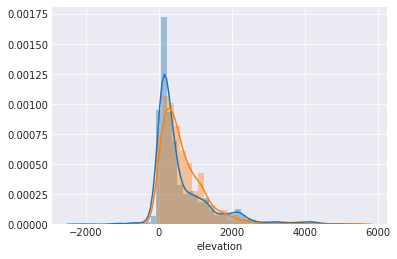

In [37]:
sns.distplot(have_elevation[np.invert(have_elevation['Tone Language?'])]['elevation'])
sns.distplot(have_elevation[have_elevation['Tone Language?']]['elevation'])

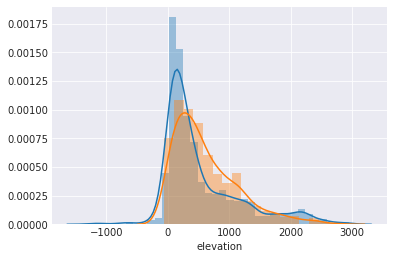

In [38]:
# getting rid of the 3 SD outliers to get a better picture
no_out=have_elevation[((have_elevation['elevation'] - have_elevation['elevation'].mean()) / have_elevation['elevation'].std()).abs() < 3]

sns.distplot(no_out[np.invert(no_out['Tone Language?'])]['elevation'])
sns.distplot(no_out[no_out['Tone Language?']]['elevation'])

## Relationship between population size and morphological complexity

All the data for this will be in WALS. Morphological complexity is a vague term, referring to how complicated the words in a language are. Here are some features that you should look at with respect to their relation to phoneme inventory size:
- Feature 30A: Number of Genders
- Feature 27A: Reduplication
- Feature 20A: Fusion of Selected Inflectional Formatives
- Feature 21A: Exponence of Selected Inflectional Formatives
- Feature 21B: Exponence of Tense-Aspect-Mood Inflection